<a href="https://colab.research.google.com/github/Usama-zia/CE888-7-SP_2021_RegNo_2010999/blob/main/lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 3)

In [2]:
#read dataset and replace 99 with NaN
df_jester= pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', na_values=["99"])
print(df_jester)

          74  -7.82  8.79  -9.66  -8.16  ...  99.22  -5.63  99.23  99.24  99.25
0      100.0   4.08 -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
1       49.0    NaN   NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2       48.0    NaN  8.35    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3       91.0   8.50  4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
4      100.0  -6.17 -3.54   0.44  -8.50  ...  -3.35   0.05  -9.08  -5.05  -3.45
...      ...    ...   ...    ...    ...  ...    ...    ...    ...    ...    ...
24977  100.0   0.44  7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24978   91.0   9.13 -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24979   39.0    NaN   NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
24980   37.0    NaN   NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
24981   72.0   2.43  2.67  -3.98   4.27  ...    NaN    NaN    NaN    NaN    NaN

[24982 rows x 101 columns]


In [3]:
#drop column containing number of jokes rated by each user
df_jester.drop('74', inplace=True, axis=1)

In [4]:
final_data=df_jester

In [5]:
final_data.head()

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,-8.4.2,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.0,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [6]:
save=final_data.idxmin()

In [7]:
print(save.sort_values(axis=0, ascending=True))

2.86          18
-9.17         94
-4.37        123
-7.18.1      123
1.12         123
           ...  
-9.42.1     8820
99.8        9053
99.12      10134
-7.72      11701
99.16      18684
Length: 100, dtype: int64


In [30]:
final_data.iloc[1428, 28]

-2.28

In [9]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [10]:
arr = df_jester.values
print(arr.shape)

rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

(24982, 100)
2498200 (2498200,)


In [11]:
new_arr, idx = replace(arr, 0.1)

In [12]:
arr[idx[0][0], idx[1][0]]

3.45

In [13]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [15]:
n_latent_factors = 2

user_ratings = final_data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [17]:
latent_user_preferences

array([[0.976, 0.391],
       [0.937, 0.734],
       [0.312, 0.878],
       ...,
       [0.913, 0.845],
       [0.516, 0.034],
       [0.141, 0.227]])

In [18]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=22.730919


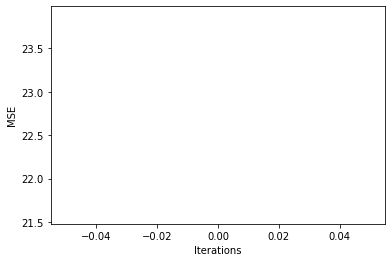

In [22]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [23]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[2.52 , 2.621, 2.688, ..., 2.39 , 2.129, 2.759],
       [4.444, 4.108, 3.966, ..., 5.109, 3.378, 6.047],
       [1.315, 0.93 , 0.741, ..., 2.012, 0.79 , 2.45 ],
       ...,
       [1.083, 0.935, 0.866, ..., 1.362, 0.775, 1.628],
       [1.364, 1.372, 1.385, ..., 1.374, 1.118, 1.6  ],
       [2.282, 2.055, 1.955, ..., 2.719, 1.695, 3.232]])

In [25]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = final_data.columns

In [26]:
comparison_data

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,-8.4.2,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,"(4.08, 2.520228384845843)","(-0.29, 2.620737915501775)","(6.36, 2.6884684585852994)","(4.37, 2.458671863817098)","(-2.38, 1.8996694679201713)","(-9.66, 3.0263568890326087)","(-0.73, 1.6198379739221191)","(-5.34, 0.9620669279532962)","(8.88, 2.569735147150888)","(9.22, 2.5184342969305584)","(6.75, 3.0608767328051543)","(8.64, 3.1775504885219794)","(4.42, 0.9070780246344945)","(7.43, 3.238335448240606)","(4.56, 0.6566720612322198)","(-0.97, 0.43858779206434273)","(4.66, 1.1150094270063617)","(-0.68, 1.2885141721065405)","(3.3, 1.978869929518593)","(-1.21, 1.758948769030808)","(0.87, 3.21001431203948)","(8.64, 3.101222752878206)","(8.35, 2.621481587347091)","(9.17, 2.224387541430818)","(0.05, 3.0300846506162085)","(7.57, 3.313271966460134)","(4.71, 2.832142805671749)","(0.87, 2.8740748219253462)","(-0.39, 2.7910494430454356)","(6.99, 2.9824215892664308)","(6.5, 2.8594836619969235)","(-0.92, 2.7493273999573264)","(7.14, 2.4957884993604926)","(9.03, 3.0305127742551825)","(-1.8, 2.9635336744160425)","(0.73, 2.695715392466389)","(7.09, 2.196257192389401)","(3.4, 2.7798822011079327)","(-0.87, 3.1388685343689793)","(7.91, 3.124378126553003)",...,"(-6.7, 3.1554713257769165)","(-3.35, 2.93390008555885)","(-9.03, 2.893815368284364)","(4.47, 2.6913270185459615)","(4.08, 3.1133506958174153)","(-3.83, 2.924673284811677)","(8.74, 2.740107604855781)","(1.12, 2.7656700006109345)","(0.78, 3.109945420923416)","(7.52, 3.0222286252874175)","(-5.0, 1.5080538791108893)","(2.77, 2.645949631987904)","(8.3, 2.3512525095181354)","(7.77, 1.5591232679526055)","(7.33, 1.9036165199176343)","(6.21, 2.59414521726478)","(7.72, 2.1873715740074338)","(8.98, 2.5382709882107948)","(8.64, 2.115622733496599)","(8.2, 2.465512525575508)","(3.93, 2.715543675733275)","(4.85, 2.3349900065183107)","(4.85, 2.5338134888605697)","(6.07, 2.1413562275488722)","(8.98, 2.4056998454691305)","(4.51, 1.917871507290134)","(-0.05, 2.409756980497854)","(3.69, 2.3274042417671)","(4.56, 2.4951402116845407)","(0.58, 2.067320157576611)","(2.82, 2.4455157916395276)","(-4.95, 2.229022640057262)","(-0.29, 2.622156767205744)","(7.86, 2.1875931670473023)","(-0.19, 2.271698513899568)","(-2.14, 2.3479226642293893)","(3.06, 2.2772553393669197)","(0.34, 2.3902157881844506)","(-4.32, 2.1288548630205613)","(1.07, 2.7594552278163125)"
1,"(nan, 4.443637182059588)","(nan, 4.107989670157799)","(nan, 3.9660671717785063)","(nan, 1.4200923406652395)","(9.03, 3.4368883550006024)","(9.27, 6.805587201920471)","(9.03, 1.7415545183191852)","(9.27, 0.39312165941557337)","(nan, 2.437721906181372)","(nan, 4.9728673054705625)","(7.33, 6.848294969409987)","(7.57, 6.958910783504934)","(9.37, -1.21303532640648)","(6.17, 6.952730018072787)","(-6.36, -1.7061995991448147)","(-6.89, -3.923882417169872)","(-7.86, 0.2890171450795869)","(9.03, 0.863803683221931)","(9.03, 3.1217568915930034)","(9.03, 1.4516581447715036)","(7.28, 7.837290334858968)","(nan, 5.540924964684898)","(8.25, 3.825082745354913)","(nan, 0.46897650109239986)","(nan, 4.882227956783879)","(7.48, 6.764726278843954)","(7.28, 8.756156445018355)","(7.28, 6.52722783803637)","(8.93, 8.35160300235649)","(nan, 3.513717520512679)","(6.17, 7.685132008277947)","(7.28, 8.687349124104609)","(nan, 1.5376350321993033)","(nan, 5.845739009926109)","(8.98, 8.666645691796496)","(7.33, 8.581848739801238)","(nan, 0.8107068798238819)","(6.17, 5.646818364554289)","(9.08, 6.279138743464214)","(7.33, 5.830216257395042)",...,"(6.46, 8.260800858895072)","(7.28, 8.60390525689778)","(nan, 4.42362397843483)","(n